<a href="https://colab.research.google.com/github/valentingracia/codingDojoDC/blob/main/Semana4Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno : Valentin Gracia
Tarea Semana 4: Playground metricas y modelos lineales

In [331]:
# Se importan las librerias

#Clásicas
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
from termcolor import colored
from google.colab import output
import missingno as msno 
import matplotlib as mpl
import matplotlib.pyplot as plt

#Widgets
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider
import ipywidgets as widgets

#Modelos
#MetricsClass
from sklearn.metrics import accuracy_score

#Modelo Lineal
from sklearn.linear_model import LinearRegression
#metricsContinuo
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error





In [332]:
from sklearn.datasets import load_boston
boston_df=pd.read_csv("/content/drive/MyDrive/Coding Dojo/Semana4/modifiedBostonHousing.csv")
boston_df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


#Exploración


In [333]:
#reconocimiento
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    505 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


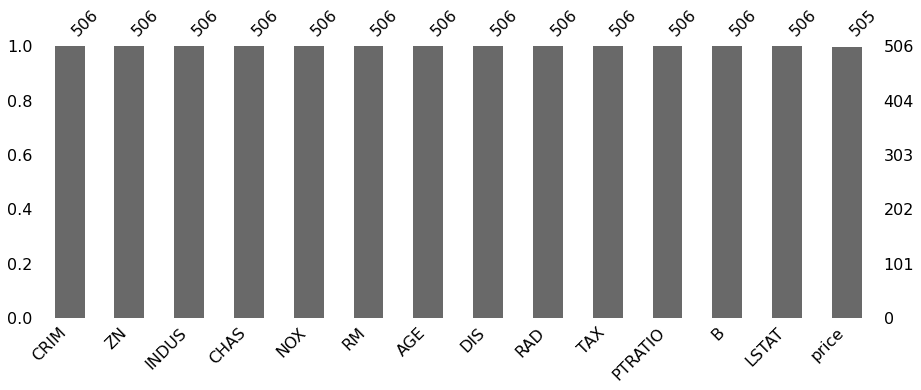

In [334]:
#missings
msno.bar(boston_df,figsize=(15,5));

#Value count adhoc

In [335]:
from google.colab import widgets

#estoy trabajando esta funcion.
def f(x=0):
  df=boston_df
  output.clear()
  f=df.iloc[:,[x]];
  f=f.value_counts()
  f=pd.DataFrame(f)
  #print(f"csm {df.iloc[:,[x]].columns}")
  #print("Variable ", colored(f"*{df.iloc[:,[x]].column}*",'red'))
  #f.index.name =df.iloc[:,[x]].columns
  f.columns = ['count']

  print("Variable ", colored(f"*{x}*  dtype:{df.dtypes[x]}",'red'))
  print("-----")
  print(f"{len(f.index)} Categorias")
  print(f"{df.shape[0]-f.values.sum()} perdidos de  {df.shape[0]}")
  if len(f.index)== df.shape[0]:
    print("UNICO, se podria usar de indice")
 
 
  return f;
  
interact(f, x=(0,len(boston_df.columns)-1))

interactive(children=(IntSlider(value=0, description='x', max=13), Output()), _dom_classes=('widget-interact',…

<function __main__.f>

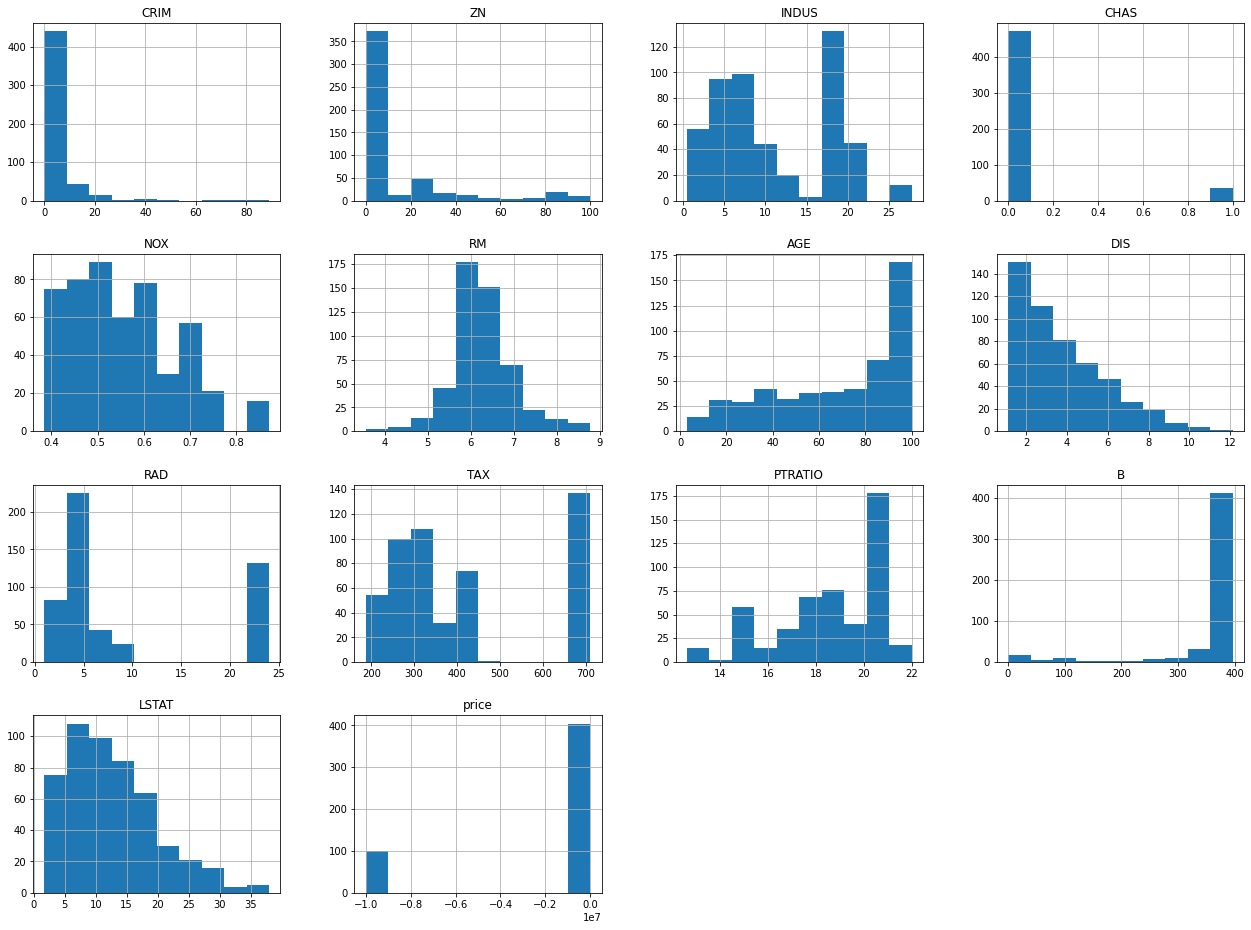

In [336]:
myLayout=(21.7,16)
boston_df.hist(figsize=myLayout);


#Enmiendas

In [337]:
boston_df.dropna(inplace=True)
boston_df=boston_df[boston_df["price"]>0]
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  price    404 non-null    float64
dtypes: float64(14)
memory usage: 47.3 KB


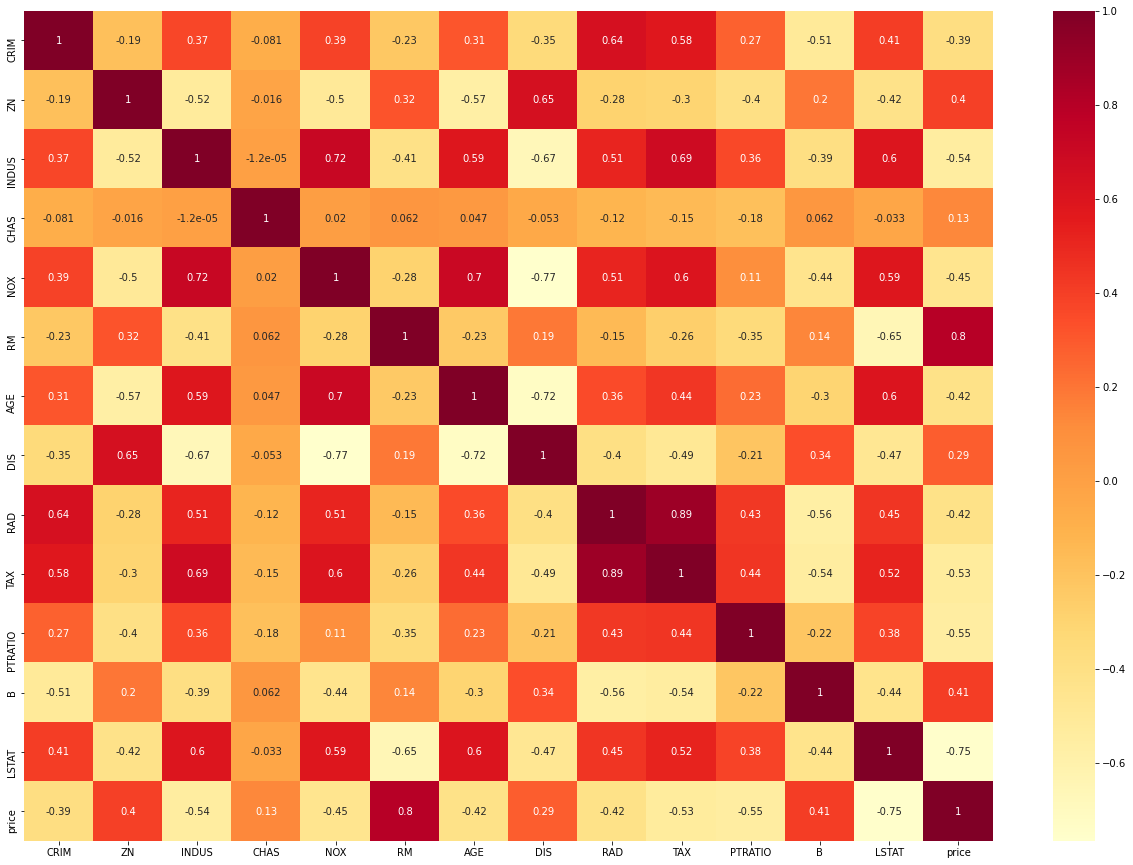

In [356]:
a4_dims = (21.7, 15.27)
fig, ax = plt.subplots(figsize=a4_dims)
sb.heatmap(boston_df.corr(), cmap="YlOrRd", annot=True);

In [339]:
Y=boston_df["price"]
X=boston_df.drop(columns=["price"])

In [340]:
model=LinearRegression(fit_intercept=True)

In [341]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [342]:
display(Y)
model.predict(X[0:10])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 404, dtype: float64

array([29.3117304 , 24.9809973 , 32.06181464, 29.60668278, 29.94220908,
       24.57987347, 22.72115377, 20.98688345, 14.70611013, 19.58887217])

In [344]:
preds=model.predict(X)

#R2 Coeficiente de Determinación

In [343]:
#R2
score=model.score(X,Y)
score

0.8425607559095524

In [345]:
r2_score(Y,preds)

0.8425607559095524

#porcentaje de la variacion vs target, puede ser explicada por las variables-Columnas

In [347]:
display(f"constantes {model.coef_}")
display(f"intercepto {model.intercept_}")

'constantes [-1.47302052e-02  1.48553198e-02  3.37496283e-02  8.38554185e-01\n -1.52315373e+01  7.20068178e+00 -4.08203156e-02 -1.29447733e+00\n  1.27304493e-01 -1.05949113e-02 -9.72535675e-01  1.35454134e-02\n -1.77695574e-01]'

'intercepto 11.169781831022751'

#MAE

In [348]:
np.sum(np.abs(Y - preds))/len(preds)

2.7612482700977896

In [349]:

mean_absolute_error(Y,preds)

2.7612482700977896

#En promedio, nuestro modelo esta equicocado en xx unidad de target

In [350]:
#MSE


In [351]:
np.sum((Y - preds)**2)/len(preds)

13.109404560429809

In [352]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, preds)

13.109404560429809

En promedio, nuestro modelo is incorrecto en xx, unidades cuadradas de target, no es humanamente explicable el concepto.

on avereage, our mode is incorrect by about xx, squared units

#RMSE

In [353]:
np.sqrt(np.sum((Y - preds)**2)/len(preds))

3.6206911716452437

In [354]:
np.sqrt(mean_squared_error(Y, preds))

3.6206911716452437

Intepretacion: en promedio, nuestro modelo esta x incorrecet en XX unidad de columna target, esta metrica penaliza mas los errores grandes, que MAE, se recomienda mas su uso para comparacion entre 2 modelos.